In [31]:
from collections import Counter
from itertools import takewhile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from scipy.signal import argrelextrema, argrelmin

In [32]:
data = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9]

In [33]:
freq = Counter(data)
mostfreq = freq.most_common()
mostfreq

[(4, 7), (8, 7), (7, 2), (9, 2), (1, 1), (2, 1), (3, 1), (5, 1), (6, 1)]

In [34]:
modes = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))
modes

[(4, 7), (8, 7)]

In [35]:
# mostfreq.reverse()
# mostfreq

In [36]:
# less = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))
# less

In [37]:
df = pd.DataFrame(data, columns = ['valores'])
df.describe()

,valores
count,23.000000
mean,5.782609
std,2.392346
min,1.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c1bb6f198>]],
      dtype=object)

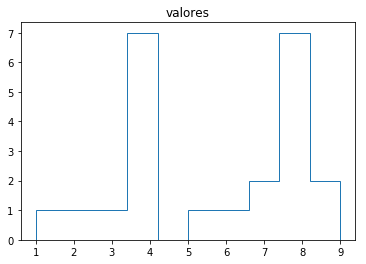

In [38]:
df.hist(histtype='step',grid=0)

In [59]:
moda = mostfreq[0]
picos = [moda]
picos

[(4, 7)]

In [60]:
for i in mostfreq[1:]: # ignora o primeiro
    if i[1] >= 0.7*moda[1]: # se a frequência for maior ou igual a 70% do maior, é outro pico
        picos.append(i)

In [ ]:
for i in range(0,len(picos)-1):
    pico1 = picos[i]
    pico2 = picos[i+1]
    # Chama a função de descobrir corte passando pico1 e pico2 como parâmetros

In [58]:
# Definindo o ponto de corte entre dois picos
def corte(pico1, pico2):
    for i in mostfreq:
        if i[0] > pico1[0] && i[0] < pico2[0]
        
    if i[0] > moda[0] && i[0] < 

[(8, 7)]

In [10]:
bootstrap = pd.DataFrame({'meangrade': [df.sample(100,replace=True).valores.mean() for i in range(1000)]})

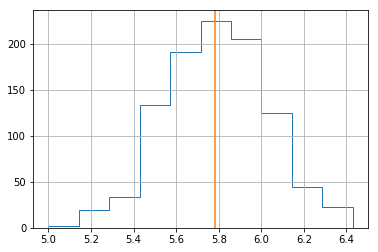

In [11]:
bootstrap.meangrade.hist(histtype='step')
plt.axvline(df.valores.mean(),color='C1')

In [12]:
bootstrap.describe()

,meangrade
count,1000.000000
mean,5.791250
std,0.238903
min,5.000000
25%,5.637500
50%,5.780000
75%,5.960000
max,6.430000


In [13]:
negoco = np.array(data)
negoco

array([1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9,
       9])

In [30]:
def split (arr, value):
    return arr[arr<value], arr[~(arr<value)]